## 1.

### 데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     


In [22]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    41024 non-null  object        
 1   StockCode    41024 non-null  object        
 2   Description  41024 non-null  object        
 3   Quantity     41024 non-null  int64         
 4   InvoiceDate  41024 non-null  datetime64[ns]
 5   UnitPrice    41024 non-null  float64       
 6   CustomerID   41024 non-null  float64       
 7   Country      41024 non-null  object        
 8   date         41024 non-null  object        
 9   price        41024 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 3.1+ MB


### 1.1 
F(소비자별 구매빈도), M(소비자별 총 구매액) feature를 새로 생성해서 그 결과값으로 탐색적 분석 실시


In [23]:
import datetime as dt
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : dt.datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [132]:
df['date'] = df['InvoiceDate'].dt.date
df['price'] = df['Quantity'] * df['UnitPrice']

F = df.groupby(['CustomerID']).count()['date']
M = df.groupby(['CustomerID'])['price'].sum()

new_df = pd.DataFrame([F,M]).T
new_df.columns = ['F', 'M']

new_df.info() # 둘다 연속형 변수이다.

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 12348.0 to 17097.0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F       348 non-null    float64
 1   M       348 non-null    float64
dtypes: float64(2)
memory usage: 16.3 KB


In [133]:
new_df.describe()

,F,M
count,348.000000,348.000000
mean,117.885057,3960.727356
std,354.247025,18821.144519
min,1.000000,-1126.000000
25%,23.000000,452.000000
50%,51.500000,1008.990000
75%,113.250000,2760.185000
max,5903.000000,279489.020000


In [134]:
new_df

,F,M
CustomerID,,
12348.0,31.0,1797.24
12349.0,73.0,1757.55
12350.0,17.0,334.40
12352.0,95.0,1545.41
12354.0,58.0,1079.40
...,...,...
14935.0,10.0,1784.71
14936.0,366.0,8117.42
14937.0,35.0,1617.63


(array([344.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([ -1126.   ,  26935.502,  54997.004,  83058.506, 111120.008,
        139181.51 , 167243.012, 195304.514, 223366.016, 251427.518,
        279489.02 ]),
 <BarContainer object of 10 artists>)

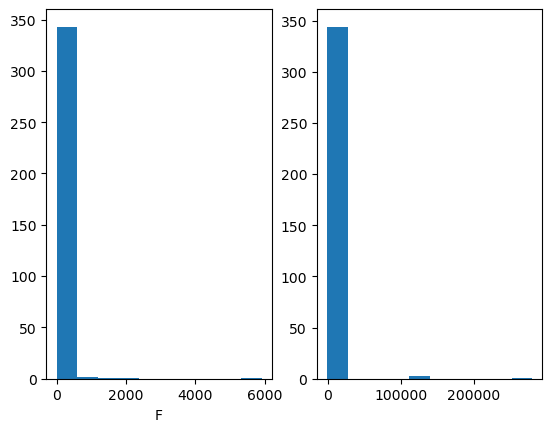

In [135]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].hist(new_df['F'])
ax[0].set_xlabel('F')
ax[1].hist(new_df['M'])

Text(0.5, 0, 'M')

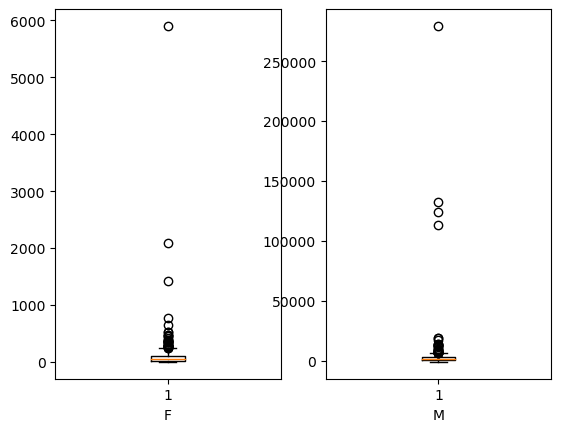

In [136]:
# boxplot 을 통해 이상치 확인
fig, ax = plt.subplots(1,2)
ax[0].boxplot(new_df['F'])
ax[0].set_xlabel('F')
ax[1].boxplot(new_df['M'])
ax[1].set_xlabel('M')

### 1.2 
F, M feature 기반으로 군집분석 실시, 필요시 이상값 보정

In [137]:
# Invoice 유니크한 값 구하기
df['InvoiceDate'].unique().shape

(2084,)

In [138]:
# 2084일까지 살 수 있는데 5000이 넘는 값이 생긴것은 매일 2~3개의 물품을 샀다는 것
# 따라서 2084가 넘는 F 값이 몇개 인지 확인

new_df[new_df['F'] > 2084]

,F,M
CustomerID,,
14646.0,2085.0,279489.02
14911.0,5903.0,132572.62


Text(0.5, 0, 'M')

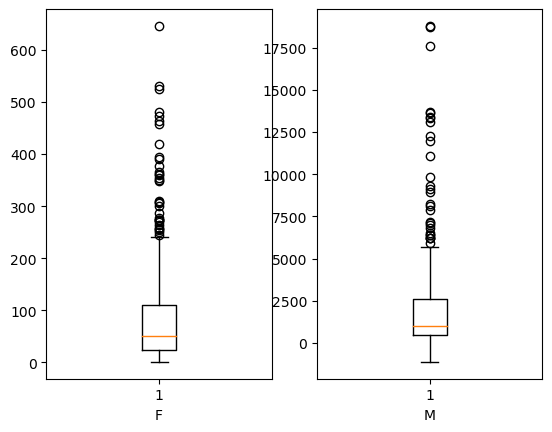

In [140]:
# 2개이므로 삭제하기로 하자
# 다시 boxplot 그려보자.
new_df = new_df[new_df['M'] <= 100000]

# boxplot 을 통해 이상치 확인
fig, ax = plt.subplots(1,2)
ax[0].boxplot(new_df['F'])
ax[0].set_xlabel('F')
ax[1].boxplot(new_df['M'])
ax[1].set_xlabel('M')

군집분석 실시

In [141]:
import warnings
warnings.filterwarnings(action='ignore')

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_df_scaled = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)

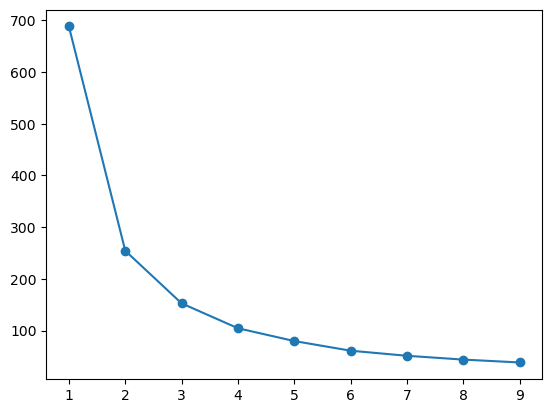

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

I = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(new_df_scaled)
    I.append(kmeans.inertia_) # 오차제곱합

plt.plot(list(range(1,10)), I, marker = 'o')
plt.show()

군집 수는 3개로 하는 것이 적절해보인다.

In [144]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df_scaled)
new_df_scaled['cluster'] = kmeans.labels_

In [145]:
new_df_scaled['cluster'].value_counts()

cluster
0    267
2     65
1     12
Name: count, dtype: int64

### 1.3 
군집 결과의 적합성을 군집 내 응집도, 군집 간 분리도의 개념을 사용해서 서술

군집분석의 원리는 크게 두 가지이다.

+ 군집 내 응집도 최대화
+ 군집 내 분리도 최대화

군집 내 응집도 최대화는 같은 군집 내 응집도를 최대화하는 것으로, 같은 군집 내 객체들의 거리를 최소화하는 것이다.  
군집 내 분리도 최대화란 다른 군집 간 거리를 최대화하는 것이다.  
이때, inertia의 값이 작을수록 응집도가 높게 군집이 잘 되었다고 생각할 수 있다.

### 1.4 
적합된 군집 별 특성에 대한 의견과 비즈니스적 판단 제시

In [146]:
new_df['cluster'] = kmeans.labels_

new_df.groupby('cluster').mean()

,F,M
cluster,,
0,44.269663,952.110861
1,425.333333,13305.610000
2,214.061538,4850.476462


1번 클러스터는 구매 빈도와 구매액이 가장 크게 나타나므로 추가 상품이나 이벤트 상품같은 것을 줘서 앞으로도 더 자주이용하도록 하면 좋을 것이다.

0번 클러스터는 잘 구매하지 않는 고객이므로 복귀 이벤트같은 것을 하면 좋을 것 같다.

## 2번 
시계열분석
- 데이터 설명    
  각 raw는 관광지 A의 1990년 1월 부터 25년동안의 매달 평균 이용객 숫자이다.

In [147]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem2.csv',index_col = 0)
df.head()

,counts
0,544.3
1,603.1
2,NaN
3,533.4
4,619.5


### 2-1 
EDA와 시각화를 진행하라

In [157]:
df['date'] = pd.date_range('1990-01', freq = 'M', periods = 300)
df = df.set_index('date')

In [171]:
df.head()

,counts
date,
1990-01-31,544.3
1990-02-28,603.1
1990-03-31,NaN
1990-04-30,533.4
1990-05-31,619.5


In [159]:
df.info() # 5개의 결측치가 존재한다.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1990-01-31 to 2014-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   counts  295 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


<Axes: xlabel='date'>

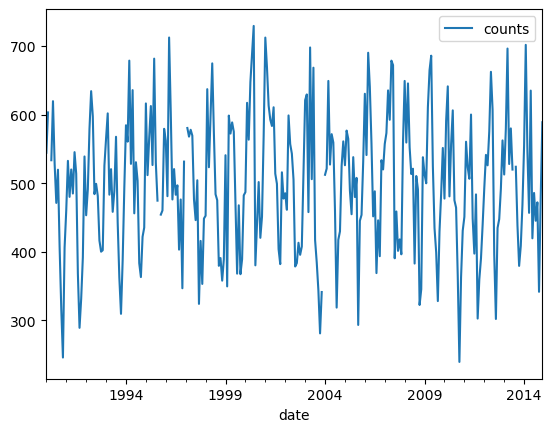

In [168]:
df.plot()

In [175]:
# 정상성을 확인하기 전에 결측치가 있으면 정상성을 확인할 수 없으므로 결측치를 처리하자.
# 결측치 처리에 대한 설명은 다음 문제에 있으므로 생략한다.
df = df.interpolate(method= 'cubic')
df

,counts
date,
1990-01-31,544.3
1990-02-28,603.1
1990-03-31,533.4
1990-04-30,533.4
1990-05-31,619.5
...,...
2014-08-31,445.2
2014-09-30,472.0
2014-10-31,341.6


In [191]:
df_head = df.head(288)
df_tail = df.tail(12)

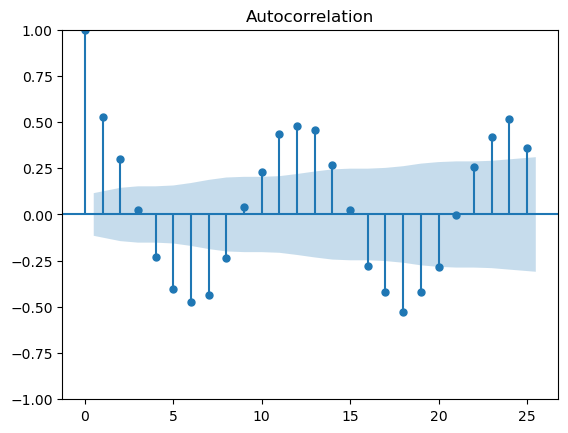

-3.4974298112666133 0.008053347820856581


In [192]:
# 시계열 데이터의 정상성을 확인하자.
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_head)
plt.show()
adf = adfuller(df_head, regression = 'C')
statistic, pvalue = adf[0], adf[1]

print(statistic, pvalue)

# 데이터가 정상성을 만족한다.

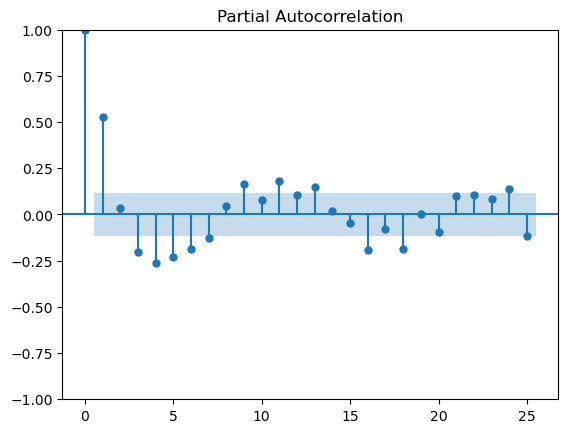

array([0.03464289])

In [193]:
# 자기상관성을 확인해보자.
# Durbin watson 검정으로 자기상관성을 띄는지 확인한다.
# 2에 가까우면 자기 상관이 없고 0 또는 4에 가까우면 자기 상관이 있다.
plot_pacf(df_head)
plt.show()

from statsmodels.stats.stattools import durbin_watson

result = durbin_watson(df_head)
result

# 자기상관이 있는 것으로 판단된다.

### 2-2 
결측치 처리와 해당 결측치 처리 방식에 대한 논리적 근거를 제시하라

결측치를 처리하는 방법에는 여러가지가 있다.  
여기서는 결측치의 수가 많이 않으므로 제거보다는 대체하는 것이 효율적이다.  
결측치 대체 방법으로는 단순확률대치, 대푯값으로 대치, KNN 등 알고리즘을 이용한 대치 등이 있는데 이 데이터는 시계열 데이터이므로 보간법으로 진행하는 것이 효율적이라고 판단하여 보간법으로 대체하였다.

### 2-3 
계절성을 반영한 시계열 모델을 제시하고 정확도 측면에서 모델 성능 평가 할 것

In [194]:
# 계절성을 반영한 시계열 모델은 SARIMAX가 있다.
# SARIMAX 의 파라미터를 정해주기 위해 먼저 auto_arima 모델로 파라미터를 정해주겠다.

from pmdarima import auto_arima
auto_arima(df_head, start_p = 1, max_p = 5, start_q = 1, max_q = 5, 
           start_P = 0, max_P = 5, start_Q = 0, max_Q = 5,
           seasonal= True, trace = False, error_action='warn', suppress_warnings=True)

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [197]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_head, order = (1, 0, 0),
                seasonal_order= ( 0, 0, 0, 0), trend = 'c')

result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 counts   No. Observations:                  288
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1679.994
Date:                Wed, 01 Nov 2023   AIC                           3365.988
Time:                        15:20:10   BIC                           3376.977
Sample:                    01-31-1990   HQIC                          3370.392
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    234.8142     25.967      9.043      0.000     183.919     285.709
ar.L1          0.5285      0.050     10.491      0.000       0.430       0.627
sigma2      6838.2913    592.598     11.540      0.0

In [200]:
pred = result.predict(start = df_tail.index[0], end = df_tail.index[-1])

# 평가지표 mse 로 성능을 확인하자.
from sklearn.metrics import mean_absolute_error

mse = mean_absolute_error(df_tail, pred)
mse

# 평균적으로 79명의 예측 오차가 발생한다.

79.18490607024232

### 2-4 
분석 결과 활용 가능 여부에 대한 분석 전문가로서의 제안

매월 79명의 오차가 발생한다고 하면 오차가 크기 때문에 이 모델을 그대로 사용하긴 어려울 것이다.  
하지만 지금은 날짜에 따른 이용객 수만 가지고 모델을 만들었기 때문에 추가적인 변수가 주어진다면 더 정확한 예측을 할 수 있을 것이라 판단된다.  
또한 변수가 주어진다면 ARIMA 모델 말고 LSTM 이나 XGBRegressor 같은 머신러닝, 딥러닝을 활용한 모델도 사용할 수 있을 것이라 판단된다.

## 3번
### 3-1 
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [205]:
# 조화평균을 사용한다.
from scipy.stats import hmean

data = [100, 80]
hmean(data)

88.88888888888889

### 3-2 
연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?

In [207]:
# 기하평균을 이용한다.
from scipy.stats import gmean
data = [4000 / 3000, 5000/4000]

gmean(data)

1.2909944487358056

### 3-3 
남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고, 남성 중에서 등산을 좋아할 확률을 구하시오

In [211]:
data = pd.DataFrame({'등산' : [20, 15], '수영' : [10, 30]}, index = ['남자', '여자'])
data

,등산,수영
남자,20,10
여자,15,30


In [212]:
20 / (20 + 10)

0.6666666666666666

### 3-4 
표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

In [219]:
import numpy as np
from scipy.stats import chi2
n = 10
v = 90
df = n-1
conf_a = 0.05

conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2 ,df)

CR1 = df*v/conf_c1
CR2 = df*v/conf_c2

print('신뢰구간 : {} ~ {}'.format(CR1, CR2))

신뢰구간 : 42.58055444790953 ~ 299.95672846672363


## 4번 
임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  신뢰구간 95%, 차이가 존재하는지 확인하려한다.


### 4-1 
귀무가설과 연구가설을 제시하시오

In [220]:
# H0 : 혈압약 투약 이전과 이후 차이가 없다.
# H1 : 혈압약 투약 이전과 이후 차이가 있다.

### 4-2 
검정 후 귀무가설 기각 여부 제시

In [228]:
from scipy.stats import t
n = 20
d = 24
s = 9
test_a = 0.05
SE = s / np.sqrt(n)
tstats = (d - 0) / SE

pvalue = (1-t.cdf(np.abs(tstats), df))*2 
pvalue

# 귀무가설을 기각한다. 즉 혈압약 투약 이전과 이후의 차이가 있다.

8.118110108590315e-07

## 5번 
공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다. 각 공장의 중위수의 차이가 존재하는지 확인하려 한다.

In [234]:
import pandas as pd
df = pd.read_csv('./data25/problem5.csv', encoding= 'cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


In [238]:
X = df[df['공장명'] == 'X']['출하 소요시간']
Y = df[df['공장명'] == 'Y']['출하 소요시간']
Z = df[df['공장명'] == 'Z']['출하 소요시간']

### 5-1. 
연구가설과 귀무가설을 설정하시오

In [ ]:
# H0 : 각 공장의 중위수의 차이는 없다.
# H1 : 각 공장의 중위수의 차이가 있다.

### 5-2. 
검정통계량을 구하고 가설을 채택하시오

In [241]:
# 정규성 검정
# H0 : 정규성 만족
# H1 : 정규성 불만족
from scipy.stats import shapiro

print(shapiro(X))
print(shapiro(Y))
print(shapiro(Z))

# 모두 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.

ShapiroResult(statistic=0.9752241969108582, pvalue=0.9264748692512512)
ShapiroResult(statistic=0.954872727394104, pvalue=0.6041566133499146)
ShapiroResult(statistic=0.9721502065658569, pvalue=0.9040274024009705)


In [242]:
# 등분산성 검증
# H0 : 등분산성 만족
# H1 : 등분산성 불만족
from scipy.stats import levene

levene(X, Y, Z)

# 등분산성을 만족한다.

LeveneResult(statistic=1.3941742524716658, pvalue=0.25954846310105517)

In [245]:
# 등분산성을 만족하니 stats f_oneway 를 이용해 검정한다
# 만약 만족하지 않으면 welch_anova 분석을 이용

from scipy.stats import f_oneway

f_oneway(X, Y, Z)

# 귀무가설을 기각하지 않는다. 즉 평균이 같다고 할 수 있다.

F_onewayResult(statistic=0.4766856291462346, pvalue=0.6242353005571999)

## 6번 
1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오.

In [251]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data = {"1개년" : [10,15,12,13,16],
                         "2개년" : [20,14,11,25,30],
                         "3개년" : [15,19,30,20,24]},
                 index = ['1안', '2안', '3안', '4안', '5안'])
df

,1개년,2개년,3개년
1안,10,20,15
2안,15,14,19
3안,12,11,30
4안,13,25,20
5안,16,30,24
